# Základy práce s Python v Google API - Vision
Python lze použít jako základní scriptovací jazyk, nebo jako silný programovací jazyk s objekty a vlasními knohovnami. V tomto cvičení budeme využívat ukázek spouštěšní scriptů v prostředí jupyter, které umožňuje interaktivní práci s jazykem Python. Detaily na (https://jupyter.org/).

Příkazy se zpracovávají jeden po druhém, symbol ukončení je konec řádku, vnitřní blok se odděluje tabulátorem

# Google API a instalace knihoven
Klíčové knihovny, které budeme používat pro práci s google api jsou k dispozici v rámci instalačních balíků pomocí pip (https://pip.pypa.io/en/stable/) nebo přes nástroj Anaconda (https://www.anaconda.com/) (již máte nainsotalované na vašich virtuálních strojích). Konkrétní knihovny, které budeme potřebovat jsou nálsedující:
- `google-cloud-language` pro analýzu jazyka
- `google-cloud-vision` pro analýzu pbrazu
- `google-cloud` zastřešující balík, pokud nechcete načítat jednotlivé balíky 
- `google-oauth` pro zajištění snadné autentizace

Je důležité vědět, jak si potřebné knihovny do Python nainstalovat. K tomu slouží příkaz

```pip install --user --upgrade google-cloud-language google-cloud google-cloud-vision google-oauth matplotlib ipython```,

který spusťte v příkazové řádce (Windows => Start => Command prompt)

Základem jazyka Python je práce s knihovnami a kontrola, že vše je správně nainstalované. Načtení knihovan a ověření provedeme pomocí následujícího příkazu:

In [1]:
from google.cloud import vision
from google.oauth2 import service_account

V případě, že se vám povedlo předchozí příkazy spustit bez chybových hlášek, je vše korektně nainstalováno a je možné začít pracovat s Google API. Než k tomu přistoupíme, bude potřeba ještě nahrát knihovny pro práci s obrázky

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import io

Dalším kontrolním bodem je schopnost přihlásit se k vašemu účtu z Python, k tomu slouží následující příkazy. Je potřeba začít s tím, aby jste již vygenerovaný soubor s přihlašovacími údaji zpřístupnili pythony:

In [3]:
creds = service_account.Credentials.from_service_account_file('C:/Users/User/Desktop/obraz/project-kanz00-39d4c5430a0a.json')

In [4]:
client = vision.ImageAnnotatorClient(credentials=creds)

Začneme jednoduchým testem funkčnosti API na jednom obrázku, odkaz na název dejme do proměnné:

In [21]:
soubor = 'C:/Users/User/Desktop/obraz/data/tym12/100000.jpg'
soubor

'C:/Users/User/Desktop/obraz/data/tym12/100000.jpg'

Načteme obrázek ze souboru:

In [22]:
with io.open(soubor, 'rb') as image_file:
    content = image_file.read()

Předáme obrázek do Google knihovny ```vision```:

In [23]:
image = vision.Image(content = content)

Nyní můžeme odeslat obrázek ke zpracování pomocí Google API a získat popis obrázku pomocí funkce ```label_detection```. Detail k funkci najdete na následujících stránkách (https://googleapis.dev/python/vision/latest/vision_v1/services.html).

In [24]:
response = client.label_detection(image = image)

Výstup je k dispozici v pomocí funkce ```label_annotations```

In [25]:
labels = response.label_annotations

Než si projdeme popisky obrázku vrácené funkcí Google API, podívejme se na obrázek.

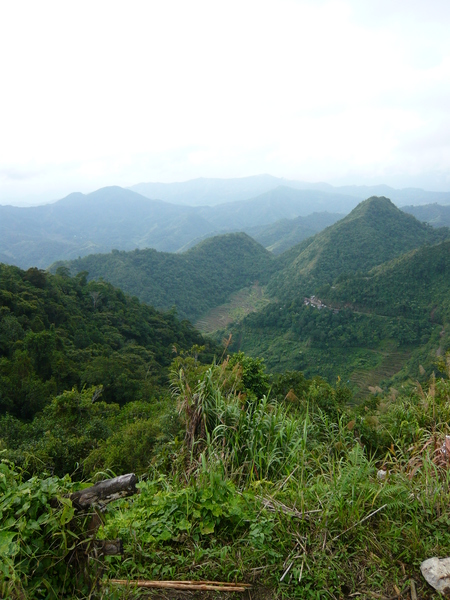

In [26]:
Image(soubor)

Nyní se podívejme, jaké ```Labels``` nám Google API vrátil:

In [27]:
print('Labels:')
for label in labels:
    print(label.description)

Labels:
Vegetation
Nature
Mountainous landforms
Highland
Terrain
Mountain
Ecoregion
Atmospheric phenomenon
Hill station
Nature reserve


# Nyní trocha automatizace
projdeme všechny soubory v adresáři a provedeme analýzu na nich:

In [28]:
import os

In [29]:
path = 'C:/Users/User/Desktop/obraz/data/tym12'

In [30]:
def get_labels(image):
    with io.open(image, 'rb') as image_file:
        content = image_file.read()
    image = vision.Image(content = content)
    labels = client.label_detection(image=image).label_annotations
    return labels

In [31]:
labels_images = {}

In [33]:
directories = os.listdir(path)
print(directories)

['100000.jpg', '100701.jpg', '100901.jpg', '101401.jpg', '101501.jpg', '101504.jpg', '102202.jpg', '102302.jpg', '102402.jpg', '103002.jpg', '126201.jpg', '133200.jpg', '133202.jpg', '139602.jpg', '149902.jpg']


In [34]:
for i in directories:
    lbls = get_labels(os.path.join(path, i))
    lbl_set = [i.description for i in lbls]
    labels_images[os.path.join(path, i)] = lbl_set

In [35]:
print(labels_images)

{'C:/Users/User/Desktop/obraz/data/tym12\\100000.jpg': ['Vegetation', 'Nature', 'Mountainous landforms', 'Highland', 'Terrain', 'Mountain', 'Ecoregion', 'Atmospheric phenomenon', 'Hill station', 'Nature reserve'], 'C:/Users/User/Desktop/obraz/data/tym12\\100701.jpg': ['Blue', 'Lighting', 'Night', 'Electricity', 'Christmas decoration', 'Majorelle blue', 'Darkness', 'Landmark', 'Light', 'Electric blue'], 'C:/Users/User/Desktop/obraz/data/tym12\\100901.jpg': ['Daytime', 'Sky', 'Atmosphere', 'Sunlight', 'Light', 'Tints and shades', 'World', 'Morning', 'Cumulus', 'Heat'], 'C:/Users/User/Desktop/obraz/data/tym12\\101401.jpg': ['Fluid', 'Liquid', 'Sky', 'Cloud', 'Sunset', 'Sunrise', 'Dusk', 'Horizon', 'Evening', 'Amber'], 'C:/Users/User/Desktop/obraz/data/tym12\\101501.jpg': ['Sky', 'Mountainous landforms', 'Cloud', 'Highland', 'Mountain', 'Mountain range', 'Atmospheric phenomenon', 'Terrain', 'Cumulus', 'Valley'], 'C:/Users/User/Desktop/obraz/data/tym12\\101504.jpg': ['Mountainous landforms'

In [36]:
tags = {}
for k, v in labels_images.items():
    for j in v:
        pocet = tags.get(j, [0, []])[0] + 1
        seznam = tags.get(j, [0, []])[1]
        seznam.append(k)
        tags[j] = [pocet, seznam]

In [37]:
sort_tabs = sorted(tags.items(), key = lambda x: x[1], reverse = True)

In [38]:
print(sort_tabs[0])

('Mountain', [6, ['C:/Users/User/Desktop/obraz/data/tym12\\100000.jpg', 'C:/Users/User/Desktop/obraz/data/tym12\\101501.jpg', 'C:/Users/User/Desktop/obraz/data/tym12\\101504.jpg', 'C:/Users/User/Desktop/obraz/data/tym12\\102402.jpg', 'C:/Users/User/Desktop/obraz/data/tym12\\133200.jpg', 'C:/Users/User/Desktop/obraz/data/tym12\\133202.jpg']])


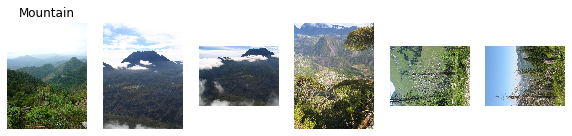

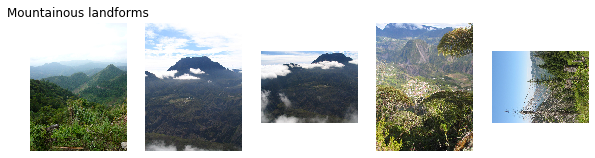

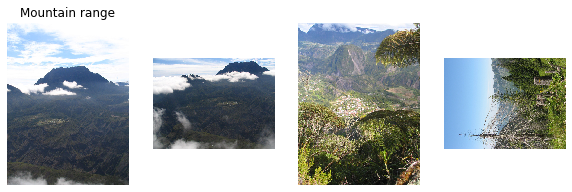

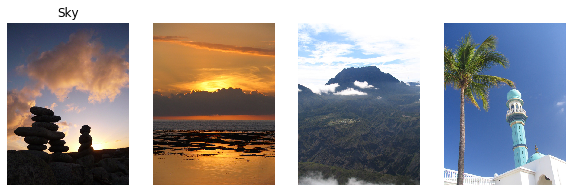

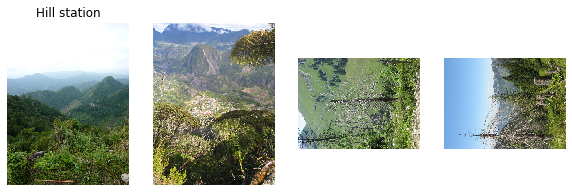

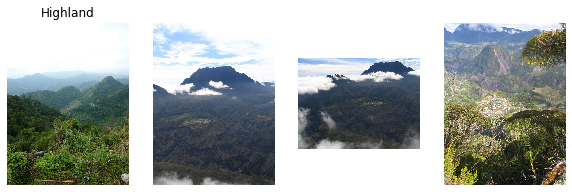

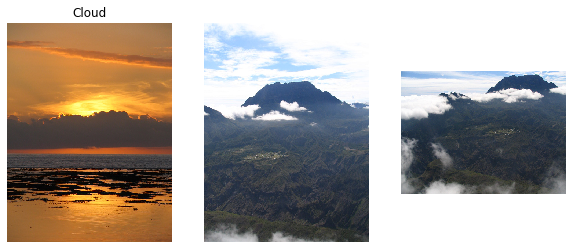

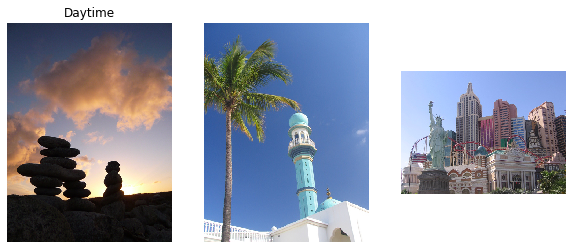

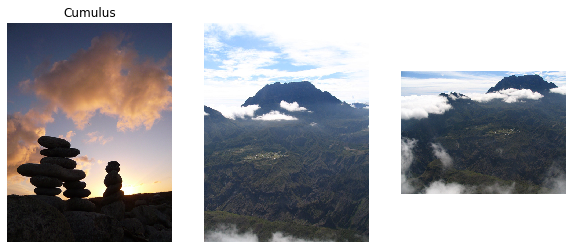

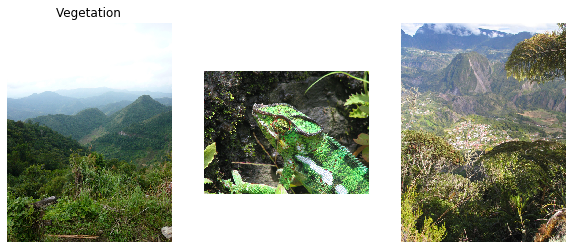

In [42]:
for k in range(10):
    pocet = sort_tabs[k][1][0]
    f, ax = plt.subplots(1, pocet, figsize = (10, 10))
    ax[0].set_title(sort_tabs[k][0])

    for i in range(pocet):
        ax[i].imshow(imread(sort_tabs[k][1][1][i]))
        ax[i].axis('off')

    plt.show()